

1. Обучить, нейронную сеть на Keras на датасете MNIST.

In [1]:
import numpy as np
import pandas as pd
import mnist
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
#from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
from scikeras.wrappers import KerasClassifier

### Building model for digit recognition

In [3]:
#import images
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255)
test_images = (test_images / 255)

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

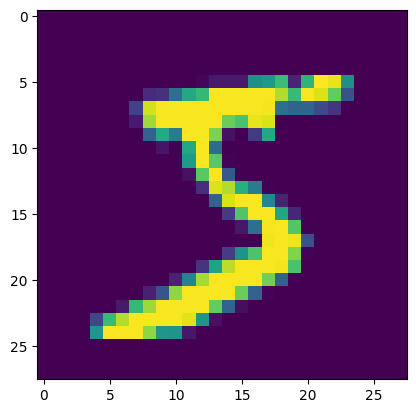

In [4]:
import matplotlib.pyplot as plt
plt.imshow(mnist.train_images()[0]/255)
mnist.train_images()[1]/255
to_categorical(train_labels)
#train_labels

In [5]:
input_shape = (28, 28, 1)

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 15s 1us/step


In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [9]:
model_2 = keras.Sequential([

    keras.Input(shape=input_shape),
    Flatten(),
    Dense(90, activation = 'relu'),
    Dense(60, activation = 'relu'),
    Dense(10, activation = 'softmax')
    ] )

In [10]:
model_2.compile(optimizer='RMSprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=500, epochs=10)

Epoch 1/10
120/120 [==============================] - 1s 4ms/step - loss: 0.5711 - accuracy: 0.8478
Epoch 2/10
120/120 [==============================] - 0s 4ms/step - loss: 0.2318 - accuracy: 0.9333
Epoch 3/10
120/120 [==============================] - 1s 4ms/step - loss: 0.1764 - accuracy: 0.9479
Epoch 4/10
120/120 [==============================] - 1s 4ms/step - loss: 0.1413 - accuracy: 0.9590
Epoch 5/10
120/120 [==============================] - 0s 4ms/step - loss: 0.1183 - accuracy: 0.9654
Epoch 6/10
120/120 [==============================] - 0s 4ms/step - loss: 0.1023 - accuracy: 0.9700
Epoch 7/10
120/120 [==============================] - 0s 4ms/step - loss: 0.0880 - accuracy: 0.9735
Epoch 8/10
120/120 [==============================] - 1s 5ms/step - loss: 0.0775 - accuracy: 0.9773
Epoch 9/10
120/120 [==============================] - 1s 4ms/step - loss: 0.0684 - accuracy: 0.9793
Epoch 10/10
120/120 [==============================] - 1s 5ms/step - loss: 0.0616 - accuracy: 0.9820

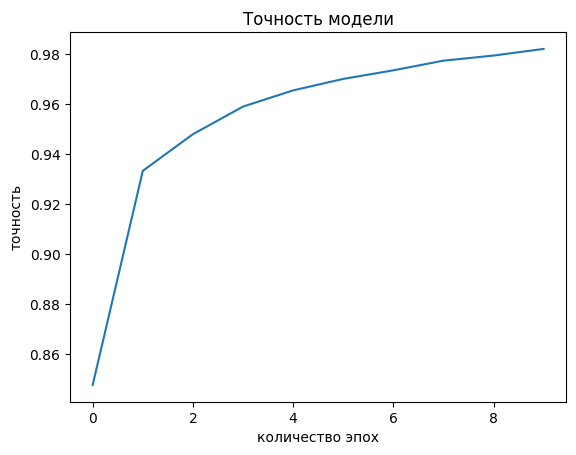

In [12]:
plt.plot(history.history['accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.show()

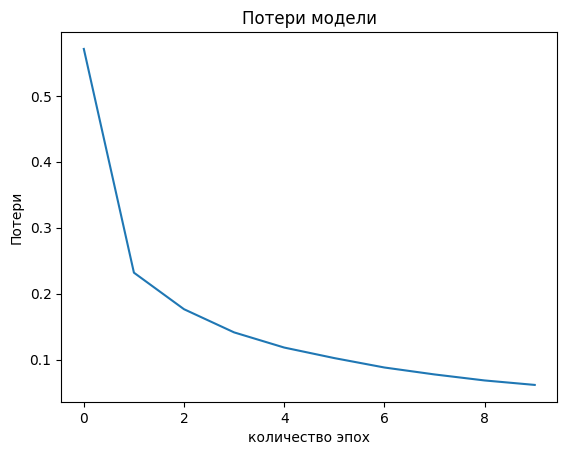

In [13]:
plt.plot(history.history['loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.show()

In [14]:
model_2.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 1ms/step - loss: 0.0867 - accuracy: 0.9719


[0.08674494922161102, 0.9718999862670898]

In [15]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0796 - accuracy: 0.9751 - val_loss: 0.1081 - val_accuracy: 0.9674
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0673 - accuracy: 0.9793 - val_loss: 0.0869 - val_accuracy: 0.9741
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0591 - accuracy: 0.9820 - val_loss: 0.0918 - val_accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0527 - accuracy: 0.9849 - val_loss: 0.0969 - val_accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0451 - accuracy: 0.9865 - val_loss: 0.0914 - val_accuracy: 0.9759
CPU times: total: 36 s
Wall time: 23.1 s


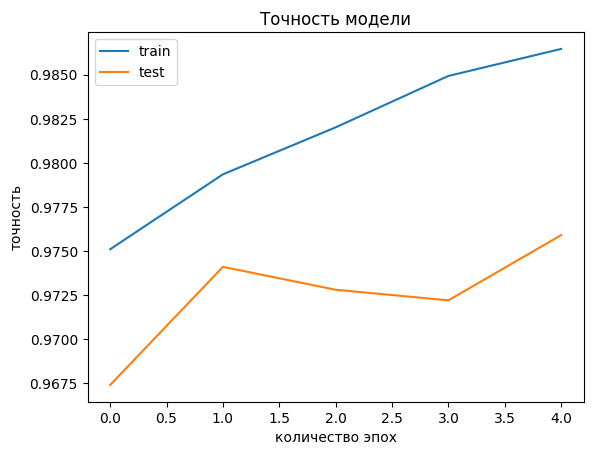

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

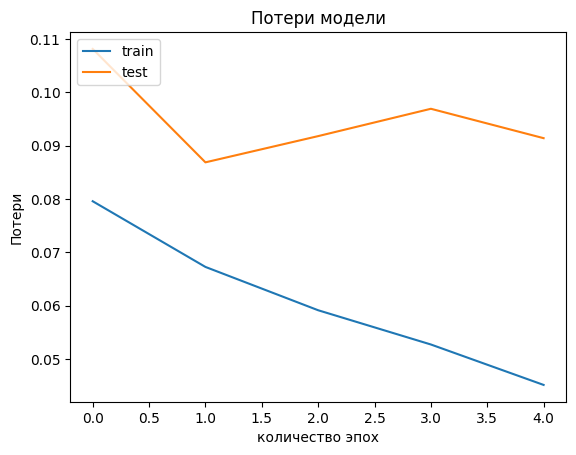

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

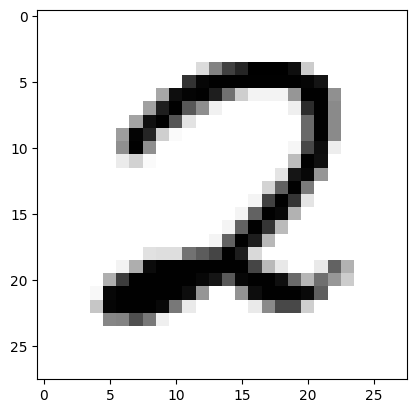

1/1 [==============================] - 0s 464ms/step
1: 2


In [18]:
n_rec=35
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

prediction = model_2.predict(x)
prediction = np.argmax(prediction[0])
print("1:", prediction)

In [19]:
# Build the model.
def create_model(optimizer='adam'):
    model = Sequential([
      Dense(64, input_shape=(784,), activation='relu'),
      Dense(32, activation='relu'),
      Dense(10, activation='softmax')
    ])

    # Compile the model.
    model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    return model

In [20]:
model = create_model()

# Train the model.
model.fit(train_images, to_categorical(train_labels), epochs=5, batch_size=32)

# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3085 - accuracy: 0.9101
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1374 - accuracy: 0.9585
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0994 - accuracy: 0.9704
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0778 - accuracy: 0.9762
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0904 - accuracy: 0.9734
**************
Loss - 0.09, Metrics - 0.973


In [21]:
# Predict on the first 10 test images.
predictions = model.predict(test_images[:10])

# Print our model's predictions.
print(f'Predictions: {np.argmax(predictions, axis=1)}')

# Check our predictions against the ground truths.
print(f'True labels: {test_labels[:10]}')

1/1 [==============================] - 0s 74ms/step
Predictions: [7 2 1 0 4 1 4 9 6 9]
True labels: [7 2 1 0 4 1 4 9 5 9]


### Picking params via GridSearchCV

In [33]:
batch_size = [ 500, 1000]
epochs = [5, 10]
optimizer = ['SGD', 'RMSprop', 'Adam']

In [34]:
model = KerasClassifier(create_model)
params= dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)
grid = GridSearchCV(model, params, refit=False, cv=3, scoring='accuracy')

grid_result = grid.fit(train_images, to_categorical(train_labels))
print(grid_result.best_score_, grid_result.best_params_)

Epoch 1/3
625/625 [==============================] - 2s 2ms/step - loss: 0.4079 - accuracy: 0.8838
Epoch 2/3
625/625 [==============================] - 1s 2ms/step - loss: 0.1890 - accuracy: 0.9456
Epoch 3/3
313/313 [==============================] - 1s 1ms/step
Epoch 1/3
625/625 [==============================] - 2s 2ms/step - loss: 0.3972 - accuracy: 0.8864
Epoch 2/3
625/625 [==============================] - 2s 2ms/step - loss: 0.1781 - accuracy: 0.9478
Epoch 3/3
313/313 [==============================] - 1s 1ms/step
Epoch 1/3
625/625 [==============================] - 2s 2ms/step - loss: 0.4217 - accuracy: 0.8797
Epoch 2/3
625/625 [==============================] - 2s 2ms/step - loss: 0.1801 - accuracy: 0.9478
Epoch 3/3
313/313 [==============================] - 1s 1ms/step
Epoch 1/3
625/625 [==============================] - 2s 2ms/step - loss: 0.4038 - accuracy: 0.8864
Epoch 2/3
625/625 [==============================] - 1s 2ms/step - loss: 0.1797 - accuracy: 0.9474
Epoch 3/3
313

C:\Users\Homin\Documents\Education\INS\DZ2\venv\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Homin\Documents\Education\INS\DZ2\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Homin\Documents\Education\INS\DZ2\venv\lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\Homin\Documents\Education\INS\DZ2\venv\lib\site-packages\scikeras\wra

In [35]:
print(grid_result.best_score_, grid_result.best_params_)

0.9614833333333334 {'batch_size': 64, 'epochs': 5, 'optimizer': 'Nadam'}


In [36]:
df = pd.DataFrame(grid_result.cv_results_)

In [37]:
df.sort_values(['mean_test_score'],ascending=False)[['param_batch_size','param_epochs','param_optimizer','mean_test_score']].head(10)

,param_batch_size,param_epochs,param_optimizer,mean_test_score
5,64,5,Nadam,0.961483
4,64,5,Adam,0.961183
10,128,5,Adam,0.960117
3,64,5,RMSprop,0.959433
9,128,5,RMSprop,0.958917
11,128,5,Nadam,0.957133
2,64,3,Nadam,0.956867
1,64,3,Adam,0.955767
16,256,5,Adam,0.954200
6,128,3,RMSprop,0.953583


ДОМАШНЕЕ ЗАДАНИЕ


In [45]:
# поменяла оптимизатор, изменяю количество нейронов

In [123]:

def my_model(optimizer='Nadam'):
    model = Sequential([
      Dense(128, input_shape=(784,), activation='relu'),
      Dense(32, activation='relu'),
      Dense(10, activation='softmax')
    ])

    # Compile the model.
    model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    return model

In [124]:
to_categorical(test_labels)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [125]:
dz_model = my_model()

# Train the model.
dz_model.fit(train_images, to_categorical(train_labels), epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model.
loss,metrics = dz_model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

Epoch 1/5
750/750 [==============================] - 4s 3ms/step - loss: 0.3329 - accuracy: 0.9069 - val_loss: 0.1749 - val_accuracy: 0.9511
Epoch 2/5
750/750 [==============================] - 2s 3ms/step - loss: 0.1349 - accuracy: 0.9602 - val_loss: 0.1323 - val_accuracy: 0.9616
Epoch 3/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0923 - accuracy: 0.9731 - val_loss: 0.1007 - val_accuracy: 0.9697
Epoch 4/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0697 - accuracy: 0.9788 - val_loss: 0.1073 - val_accuracy: 0.9690
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0845 - accuracy: 0.9747
**************
Loss - 0.08, Metrics - 0.975


In [126]:
dz_model1 = my_model()

# Train the model.
dz_model1.fit(train_images, to_categorical(train_labels), epochs=3, batch_size=32, validation_split=0.2)

# Evaluate the model.
loss,metrics = dz_model1.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

Epoch 1/3
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2744 - accuracy: 0.9204 - val_loss: 0.1439 - val_accuracy: 0.9563
Epoch 2/3
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1140 - accuracy: 0.9656 - val_loss: 0.1121 - val_accuracy: 0.9672
Epoch 3/3
313/313 [==============================] - 1s 1ms/step - loss: 0.0908 - accuracy: 0.9706
**************
Loss - 0.09, Metrics - 0.971


In [127]:
dz_model2 = my_model()

# Train the model.
dz_model2.fit(train_images, to_categorical(train_labels), epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model.
loss,metrics = dz_model2.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.4241 - accuracy: 0.8806 - val_loss: 0.1831 - val_accuracy: 0.9482
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1606 - accuracy: 0.9532 - val_loss: 0.1377 - val_accuracy: 0.9582
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1132 - accuracy: 0.9664 - val_loss: 0.1175 - val_accuracy: 0.9653
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0861 - accuracy: 0.9742 - val_loss: 0.1065 - val_accuracy: 0.9687
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0676 - accuracy: 0.9806 - val_loss: 0.1057 - val_accuracy: 0.9684
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0547 - accuracy: 0.9840 - val_loss: 0.0957 - val_accuracy: 0.9712
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0445 - accuracy: 0.9868 - val_loss: 0.0911 - val_accuracy: 0.9738
Epoch 

In [130]:
# Predict on the first 30 test images.
predictions = dz_model2.predict(test_images[:30])

# Print our model's predictions.
print(f'Predictions: {np.argmax(predictions, axis=1)}')

# Check our predictions against the ground truths.
print(f'True labels: {test_labels[:30]}')


1/1 [==============================] - 0s 23ms/step
Predictions: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
True labels: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


# Вывод:
1 Увеличение числа нейронов в первом слое улучшает показатель метрики.
2 Изменение оптимизатора на Nadam улучшает метрику.
3 Увеличение количества эпох улучшает показатель метрики.
4 Увеличение batch_size ускоряет обучение.